In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# --- 1. Hypothesis ---
# Let's hypothesize that a dependent variable 'y' (e.g., house price)
# is linearly related to multiple independent variables 'X1', 'X2', 'X3'
# (e.g., square footage, number of bedrooms, age of the house).
# Hypothesis: As X1, X2 increase, y tends to increase, and as X3 increases, y might decrease,
# all in a linear fashion, when considered together.


In [4]:
# Data Generation (Simulating Real-World Data with Multiple Features)
np.random.seed(42) # for reproducibility

# Number of samples
n_samples = 100

# Feature 1 (e.g., square footage)
X1 = 2.5 * np.random.rand(n_samples, 1) + 1.0 # Values between 1.0 and 3.5

# Feature 2 (e.g., number of bedrooms)
X2 = 1.5 * np.random.rand(n_samples, 1) + 0.5 # Values between 0.5 and 2.0

# Feature 3 (e.g., age of the house - let's make its effect negative)
X3 = 3.0 * np.random.rand(n_samples, 1) # Values between 0 and 3.0

# True coefficients for our synthetic data
true_b0 = 2.0  # Intercept
true_b1 = 1.5  # Coefficient for X1
true_b2 = 0.8  # Coefficient for X2
true_b3 = -0.5 # Coefficient for X3 (negative impact)

# y = b0 + b1*X1 + b2*X2 + b3*X3 + noise
y_data_points = true_b0 + (X1 * true_b1) + (X2 * true_b2) + (X3 * true_b3) + np.random.randn(n_samples, 1) * 0.5 # Smaller noise

# Create a Pandas DataFrame
data = pd.DataFrame(data=X1, columns=['X1_sq_ft'])
data['X2_bedrooms'] = X2
data['X3_age'] = X3
data['y_price'] = y_data_points

print("--- First 5 rows of the generated dataset: ---")
print(data.head())
print("\n")

--- First 5 rows of the generated dataset: ---
   X1_sq_ft  X2_bedrooms    X3_age   y_price
0  1.936350     0.547144  1.926095  4.401979
1  3.376786     1.454616  0.252420  7.776861
2  2.829985     0.971534  0.484886  7.851733
3  2.496646     1.262856  2.695663  5.724382
4  1.390047     1.861350  1.819287  3.651935




--- Generating Pair Plot (may take a moment)... ---


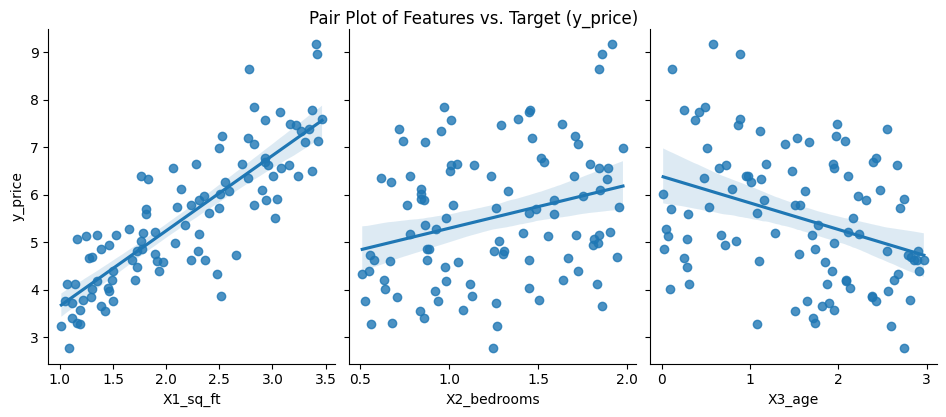

In [6]:
# Hypothesis Validation (Exploratory Data Analysis - EDA) - Pair Plot
# A pair plot is excellent for visualizing relationships between multiple variables.
# It shows scatter plots for each pair of variables and histograms for each variable.

print("--- Generating Pair Plot (may take a moment)... ---")
sns.pairplot(data, x_vars=['X1_sq_ft', 'X2_bedrooms', 'X3_age'], y_vars=['y_price'], height=4, aspect=0.8, kind='reg')
plt.suptitle('Pair Plot of Features vs. Target (y_price)', y=1.02)
plt.show()


# Observation:
# - We expect to see a positive trend between y_price and X1_sq_ft.
# - We expect to see a positive trend between y_price and X2_bedrooms.
# - We expect to see a negative trend between y_price and X3_age.
# The 'kind=reg' in pairplot will also draw a simple linear regression line for each pair.


--- Correlation Matrix: ---
             X1_sq_ft  X2_bedrooms    X3_age   y_price
X1_sq_ft     1.000000    -0.034033 -0.037654  0.840476
X2_bedrooms -0.034033     1.000000 -0.146354  0.284795
X3_age      -0.037654    -0.146354  1.000000 -0.350750
y_price      0.840476     0.284795 -0.350750  1.000000




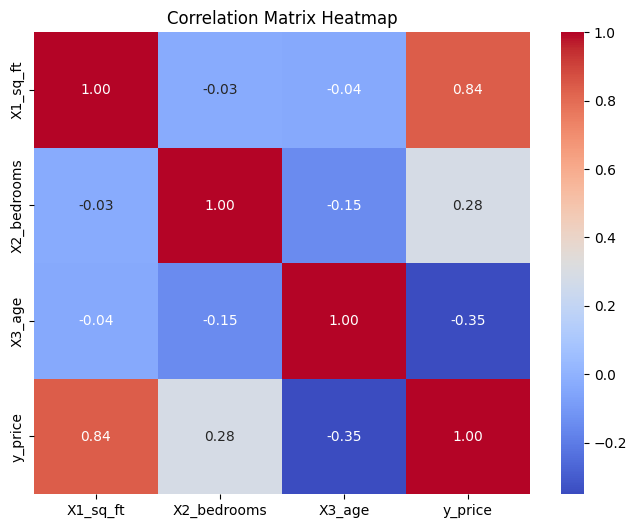

In [7]:
# Hypothesis Validation (Exploratory Data Analysis - EDA) - Correlation Matrix
correlation_matrix = data.corr()
print("--- Correlation Matrix: ---")
print(correlation_matrix)
print("\n")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observation:
# - y_price should show positive correlation with X1_sq_ft and X2_bedrooms.
# - y_price should show negative correlation with X3_age.
# - Also, check for multicollinearity (high correlation between independent variables).
#   High multicollinearity can make model coefficients unstable and hard to interpret.
#   For this synthetic dataset, it should be low.

In [8]:
# Data Preparation
# X should be a DataFrame containing all independent features.
# y should be a Series containing the dependent variable.

X_skl = data[['X1_sq_ft', 'X2_bedrooms', 'X3_age']] # Features (independent variables)
y_skl = data['y_price']                             # Target (dependent variable)

print("--- Data prepared for scikit-learn: ---")
print("X_skl shape:", X_skl.shape)
print("X_skl columns:", X_skl.columns.tolist())
print("y_skl shape:", y_skl.shape)

--- Data prepared for scikit-learn: ---
X_skl shape: (100, 3)
X_skl columns: ['X1_sq_ft', 'X2_bedrooms', 'X3_age']
y_skl shape: (100,)


In [9]:
# Train-Test Split
# Splitting data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X_skl, y_skl, test_size=0.2, random_state=42)

print("--- Shapes of the datasets after split: ---")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("\n")

--- Shapes of the datasets after split: ---
X_train shape: (80, 3)
X_test shape: (20, 3)
y_train shape: (80,)
y_test shape: (20,)




In [10]:
# Model Building and Training
# Instantiate and train the Multiple Linear Regression model.

multiple_linear_reg_model = LinearRegression()
multiple_linear_reg_model.fit(X_train, y_train)

# Learned parameters:
print("--- Model Parameters: ---")
print("Intercept (b_0):", multiple_linear_reg_model.intercept_)
print("Coefficients (b_1, b_2, b_3,...):", multiple_linear_reg_model.coef_)

# Displaying coefficients with their corresponding feature names
coeffs_df = pd.DataFrame(multiple_linear_reg_model.coef_, X_skl.columns, columns=['Coefficient'])
print("\nCoefficients per feature:")
print(coeffs_df)
print("\n")
# The equation: y_price = intercept + coef_X1*X1_sq_ft + coef_X2*X2_bedrooms + coef_X3*X3_age

--- Model Parameters: ---
Intercept (b_0): 1.5542732240090054
Coefficients (b_1, b_2, b_3,...): [ 1.63280787  0.94025674 -0.4291301 ]

Coefficients per feature:
             Coefficient
X1_sq_ft        1.632808
X2_bedrooms     0.940257
X3_age         -0.429130




In [11]:
# Making Predictions
# Use the trained model to make predictions on the test set.

y_pred_test = multiple_linear_reg_model.predict(X_test)
# y_pred_train = multiple_linear_reg_model.predict(X_train) # Optional: for training set predictions

print("--- Predictions made. First 5 test predictions: ---")
# Reshape y_pred_test to be a column vector for consistency if needed, though for printing it's fine
print(y_pred_test[:5].reshape(-1,1) if y_pred_test.ndim == 1 else y_pred_test[:5])
print("\nFirst 5 actual test values:")
print(y_test.values[:5].reshape(-1,1)) # .values to get numpy array, then reshape
print("\n")


--- Predictions made. First 5 test predictions: ---
[[5.03305082]
 [7.5922269 ]
 [6.72319081]
 [5.21855497]
 [5.09539054]]

First 5 actual test values:
[[5.06068005]
 [6.39151897]
 [6.76860019]
 [4.73613662]
 [5.28857845]]




In [12]:
# Model Evaluation
# Evaluate the model's performance on the test set.

print("--- Model Evaluation on Test Set: ---")
mae = metrics.mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (MAE):", mae)

mse = metrics.mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

r2 = metrics.r2_score(y_test, y_pred_test)
print("R-squared (Coefficient of Determination):", r2)
print("\n")
# Adjusted R-squared (Important for multiple regression as R-squared can be misleading)
# R-squared tends to increase with more predictors, even if they are not useful.
# Adjusted R-squared penalizes for adding predictors that do not improve the model.
n = X_test.shape[0] # Number of observations in the test set
p = X_test.shape[1] # Number of predictors
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R-squared:", adj_r2)
print("\n")

--- Model Evaluation on Test Set: ---
Mean Absolute Error (MAE): 0.5344417607547101
Mean Squared Error (MSE): 0.5253948902990713
Root Mean Squared Error (RMSE): 0.7248412862820875
R-squared (Coefficient of Determination): 0.6100718597407677


Adjusted R-squared: 0.5369603334421617




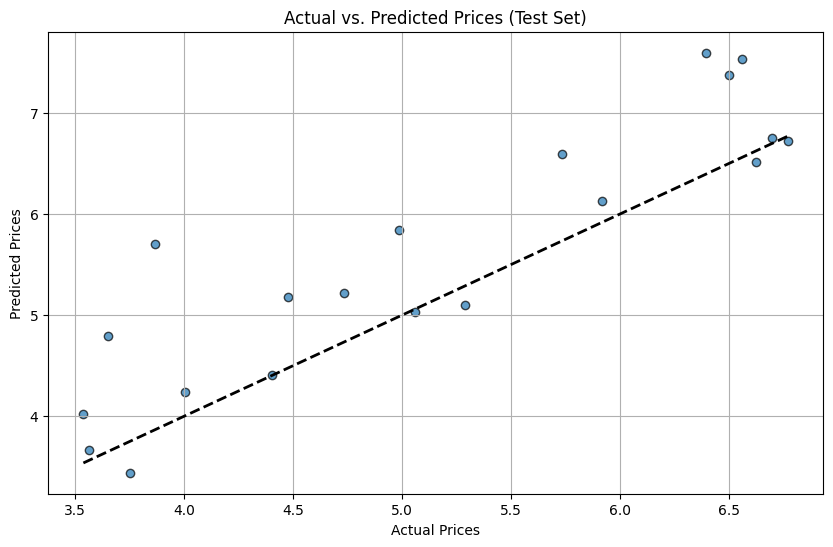

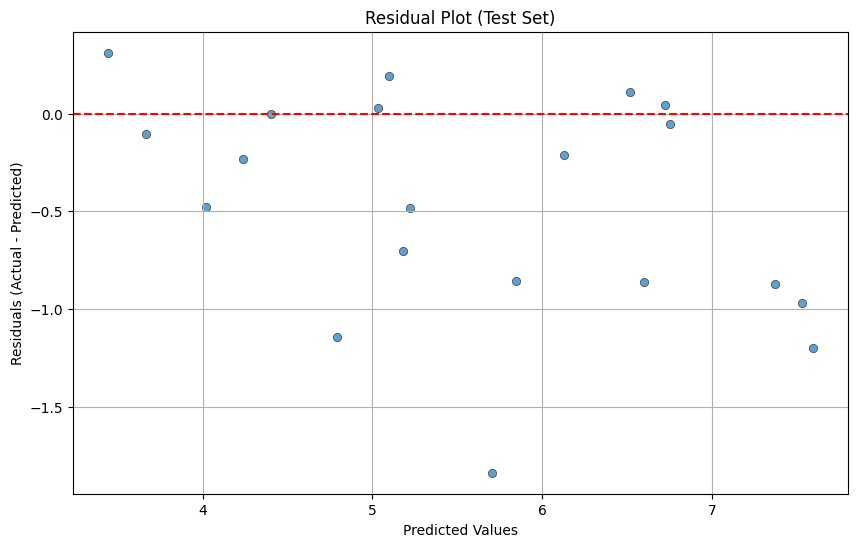

In [14]:
# Visualization of Model Performance

# 1. Actual vs. Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (Test Set)')
plt.grid(True)
plt.show()

# 2. Residuals Plot
# Residuals are the difference between actual and predicted values.
residuals = y_test - y_pred_test # This results in a Pandas Series

plt.figure(figsize=(10, 6))
# y_pred_test is a NumPy array. If it's 1D, flatten() does nothing. If it's (n,1), it makes it (n,).
# residuals.values converts the Pandas Series to a NumPy array.
sns.scatterplot(x=y_pred_test.flatten(), y=residuals.values, alpha=0.7, edgecolors='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot (Test Set)')
plt.grid(True)
plt.show()
# Ideal residual plot: points should be randomly scattered around the horizontal line y=0,
# with no clear patterns (e.g., no funnel shape, no curve). This indicates that
# the model's assumptions (like linearity and homoscedasticity - constant variance of errors) are met.

# Note: Visualizing the regression plane itself is straightforward for 2 features (3D plot),
# but becomes impossible for >2 features. The plots above are standard for evaluating any regression model.



In [15]:
# Interpreting the Results

print("--- Interpretation Example: ---")
print(f"Intercept (b_0): {multiple_linear_reg_model.intercept_:.2f}")
print("This is the estimated value of y_price when all features (X1_sq_ft, X2_bedrooms, X3_age) are zero.")
print("In many real-world scenarios, the intercept might not have a direct practical interpretation if X=0 is outside the range of data or nonsensical (e.g., 0 sq ft house).\n")

for feature, coef in zip(X_skl.columns, multiple_linear_reg_model.coef_):
    print(f"Coefficient for {feature} (b_{X_skl.columns.get_loc(feature)+1}): {coef:.2f}")
    print(f"  Interpretation: Holding all other features constant, a one-unit increase in '{feature}' is associated with an "
          f"{'increase' if coef > 0 else 'decrease'} of approximately {abs(coef):.2f} in 'y_price'.\n")

print(f"R-squared: {r2:.3f}")
print(f"  Approximately {r2*100:.2f}% of the variance in y_price can be explained by the linear combination of the features in our model, based on the test set.\n")

if not np.isnan(adj_r2):
    print(f"Adjusted R-squared: {adj_r2:.3f}")
    print(f"  The Adjusted R-squared ({adj_r2*100:.2f}%) is a more reliable measure of model fit when comparing models with different numbers of predictors.\n")
else:
    print("Adjusted R-squared: Not calculated due to insufficient data points relative to predictors.\n")


print("RMSE (Root Mean Squared Error):", f"{rmse:.2f}")
print("  This is the standard deviation of the residuals (prediction errors). Lower values indicate a better fit. It means, on average, our model's predictions are off by approximately this amount in the units of 'y_price'.")


--- Interpretation Example: ---
Intercept (b_0): 1.55
This is the estimated value of y_price when all features (X1_sq_ft, X2_bedrooms, X3_age) are zero.
In many real-world scenarios, the intercept might not have a direct practical interpretation if X=0 is outside the range of data or nonsensical (e.g., 0 sq ft house).

Coefficient for X1_sq_ft (b_1): 1.63
  Interpretation: Holding all other features constant, a one-unit increase in 'X1_sq_ft' is associated with an increase of approximately 1.63 in 'y_price'.

Coefficient for X2_bedrooms (b_2): 0.94
  Interpretation: Holding all other features constant, a one-unit increase in 'X2_bedrooms' is associated with an increase of approximately 0.94 in 'y_price'.

Coefficient for X3_age (b_3): -0.43
  Interpretation: Holding all other features constant, a one-unit increase in 'X3_age' is associated with an decrease of approximately 0.43 in 'y_price'.

R-squared: 0.610
  Approximately 61.01% of the variance in y_price can be explained by the lin